In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import cv2

import PIL
print('Pillow Version:', PIL.__version__)
import glob
from matplotlib import image
import os
from os import listdir

Pillow Version: 8.0.1


In [3]:
# load training images into directory
trainingpath = '/Volumes/Elements/ModifiedROI_4ChamberCine/Training'
loaded_images = list()
TopDirectory = listdir(trainingpath)

In [4]:
# Load in training table
patientlist = []
training_df = pd.read_excel('/Users/sevdeetoz/OneDrive - Johns Hopkins/current projects/HCM/code/Training.xls')
for patients in training_df['PatientNumber']:
    patientlist.append(str(patients))
training_df['PatientNumber'] = patientlist
training_df.head()

,PatientNumber,RowSpacing,ColumnSpacing,Xres,Yres,X_Length,Y_Length,Outcome
0,100,1.25000,1.25000,163,163,203.75000,203.75000,0
1,101,1.25000,1.25000,169,169,211.25000,211.25000,0
2,103,1.25000,1.25000,151,151,188.75000,188.75000,0
3,107,1.25000,1.25000,143,143,178.75000,178.75000,0
4,113,1.40625,1.40625,149,149,209.53125,209.53125,0


In [5]:
# Create data frame to store relevant properties of each patient/image
num_patients = len(TopDirectory)
df = pd.DataFrame(columns = ['PatientNumber','Image','X_res','Y_res','X_length','Y_length','Outcome'])
df.PatientNumber = TopDirectory

# Load in each image and store in data frame
for i in range(num_patients):
    patient = df.PatientNumber[i]
    properties = training_df[training_df['PatientNumber'] == patient]
    index = properties.index[0]
    df.Outcome[i] = properties.Outcome[index]
    df.X_length[i], df.Y_length[i] = properties.X_Length[index], properties.Y_Length[index]
    df.X_res[i], df.Y_res[i] = properties.Xres[index], properties.Yres[index]
    imagepath = trainingpath + '/' + patient
    image_dir = listdir(imagepath)
    x_dim, y_dim = plt.imread(imagepath + '/' + str(1) + '.png').shape
    num_frames = len(image_dir)
    img_data = np.zeros((x_dim,y_dim,num_frames))
    for k in range(num_frames):
        framepath = imagepath + '/' + str(k+1) + '.png'
        img_data[:,:,(k)] = plt.imread(framepath)
    df.Image[i] = img_data

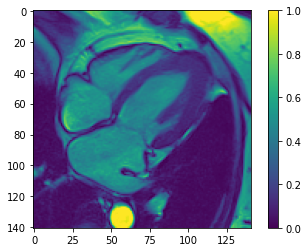

In [18]:

Images = df.Image
volume = Images[22]
plt.colorbar
plt.imshow(volume[:,:,4])
plt.colorbar()

(array([121718., 140841.,  72326.,  64077.,  62660.,  32741.,  26800.,
         21156.,  22083.,  18815.,  20957.,  21161.,  33207.,  39098.,
         50158.,  49223.,  49808.,  30597.,  24025.,  16552.,  14764.,
          9891.,  10173.,   7286.,   5924.,   3753.,   4120.,   3704.,
          3300.,  13132.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

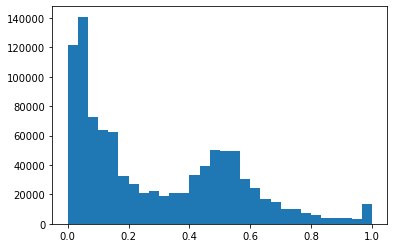

In [19]:
plt.hist(volume.flatten(), density=False, bins=30)  # density=False would make counts

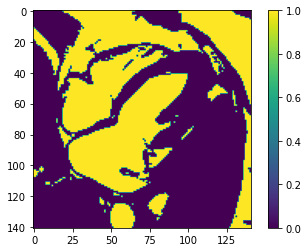

In [44]:
imageslice = volume [:,:,4]
plt.imshow(imageslice>0.3)
plt.colorbar()

# Find the Threshold with Otsu
We cannot use the pandas df if we want to use the CV2 thresholding techniques. 
We need to have a grayscale image to use this technique, not a numpy array. 

In [30]:
imageslice = cv2.imread('/Volumes/Elements/ModifiedROI_4ChamberCine/Training/22/4.png', 0)
imageslice

array([[103, 110, 113, ..., 255, 255, 255],
       [ 87, 117, 128, ..., 255, 255, 255],
       [ 77, 111, 132, ..., 255, 255, 255],
       ...,
       [  3,   3,   6, ...,   5,  10,   8],
       [  5,   3,   6, ...,   7,   8,   6],
       [  3,   5,   6, ...,  13,   7,   9]], dtype=uint8)

In [36]:
#Arguments: 1. grayscale image
#2. threshold-ignore since it is otsu
#3. the max value that will assign to the pixels that exceed threshold
ret2,th2 = cv2.threshold(imageslice,0,255,cv2.THRESH_OTSU)

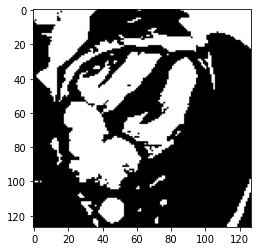

In [40]:
plt.imshow(th2,'gray')